In [31]:
# %load ./dsfs/probs.py
import math
import random
from collections import Counter
import matplotlib.pyplot as plt

def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

def uniform_cdf(x: float) -> float:
    if x < 0 : return 0
    if x < 1 : return x
    return 1

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu)**2 / 2 / sigma **2) / (math.sqrt(2 * math.pi) * sigma))


def normal_cdf(x: float, mu:float = 0, sigma: float =1) -> float:
    return (1 + math.erf((x-mu)/ math.sqrt(2) / sigma)) /2


def inverse_normal_cdf(p: float, mu: float = 0, sigma: float = 1, tolerance: float = 0.00001) -> float:
    if mu != 0 or sigma != 1: return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0
    hi_z = 10
    while (hi_z - low_z) > tolerance:
        mid_z = (low_z + hi_z) /2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        else:
            hi_z = mid_z
    return mid_p


def bernouilli_trial(p: float) -> int:
    return 1 if random.random() < p else 0


def binomial(n: int, p: float) -> int:
    return sum(bernouilli_trial(p)for _ in range(n))


def binomial_histogram(p: float, n: int, num_points: int) -> None:
    data = [binomial(n, p) for _ in range(num_points)]
    histogram = Counter(data)
    plt.bar(
        [ x - 0.5 for x in histogram.keys()],
        [v/num_points for v in histogram.values()],
        0.8,
        color='0.75'
    )
    mu = p * n
    sigma = math.sqrt(mu * (1-p))

    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title('Binomal Distribution vs Normal Approximation')
    plt.show()



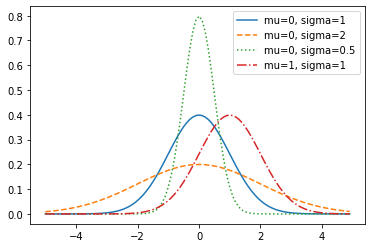

In [32]:
import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=1, sigma=1) for x in xs], '-.', label='mu=1, sigma=1')
plt.legend()
plt.show()



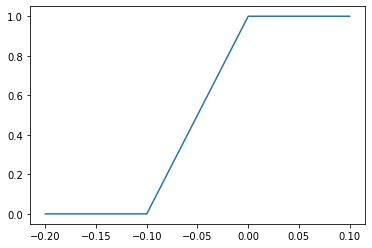

In [33]:
xs = [x/10 for x in range(-2,2)]
plt.plot(xs, [uniform_pdf(x) for x in xs])
plt.show()

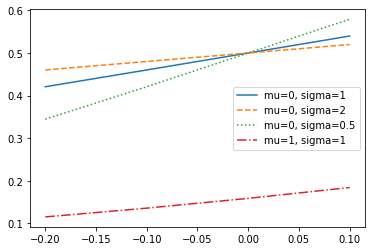

In [34]:
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=1, sigma=1) for x in xs], '-.', label='mu=1, sigma=1')
plt.legend()
plt.show()

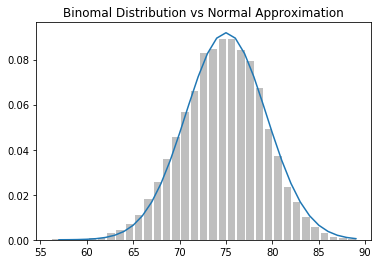

In [18]:
binomial_histogram(0.75, 100, 10000)

In [21]:
binomial(100, 0.5)

52

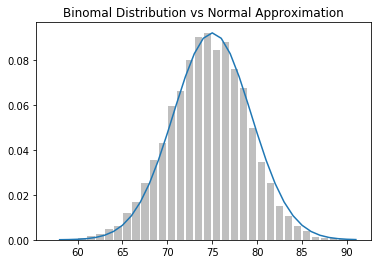

In [36]:
binomial_histogram(0.75, 100, 10000)

In [38]:
normal_cdf(50, 5)

1.0